# Case 2: Predicting with rating


# Logistic Regression


## Data importing and cleaning


In [1]:
import os
import pandas as pd
from tqdm import tqdm
import warnings
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score

print("Current working directory: ", os.getcwd())
wd = os.getcwd()
# If current working directory is incorrect, use os.chdir("path")
# Edit the name of the data file from "Movie Review" into "MovieReview"
# and should be contained in the current working directory

Current working directory:  /Users/swislar/Desktop/IT1244/Project


In [2]:
def loadAllData(WD=os.getcwd()):
    '''
    WD: Current working directory containing datasets- os.getcwd() 
    RETURN: Pandas Dataframe
    '''
    # Initialise the dataframe
    columns = ["id", "rating", "category"]
    rows = []
    posWD = os.path.join(WD, "MovieReview/data/pos")
    negWD = os.path.join(WD, "MovieReview/data/neg")
    # Read positively classified text
    for filename in tqdm(os.listdir(posWD), desc='Processing Positive Reviews'):
        # Strip .txt from filename and split ID and Rating as an integer
        posDetails = filename.rstrip(".txt").split("_")
        posID, ratings = int(posDetails[0]), int(posDetails[1])
        # Add data into the Dataframe
        row = {"id": posID, "rating": ratings, "category": 1}
        rows.append(row)
    # Repeat for negative text
    for filename in tqdm(os.listdir(negWD), desc='Processing Negative Reviews'):
        negDetails = filename.rstrip(".txt").split("_")
        # Offset id by 25000 to prevent overlaps
        negID, ratings = int(negDetails[0]) + 25000, int(negDetails[1])
        row = {"id": negID, "rating": ratings, "category": 0}
        rows.append(row)
    return pd.DataFrame(rows, columns=columns)

In [3]:
dataframe = loadAllData()
print(dataframe.head())

Processing Negative Reviews: 100%|██████████| 25000/25000 [00:00<00:00, 1905635.62it/s]

      id  rating  category
0  20935       9         1
1  12390       8         1
2   9820       8         1
3    883       7         1
4   9063       8         1


## Logistic Regression Model and Evaluation


Normalise the rating and split the data into the test set (80%) and training set (20%). Then pass the data into the logistic regression model


In [26]:
# Logistic regression
X = dataframe["rating"].values.reshape(-1, 1)
y = dataframe["category"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

precision = precision_score(y_test, y_pred)
print("Precision:", precision)

Accuracy: 1.0
Precision: 1.0


# Neural Network


## Load libraries


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Dense, Dropout
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

## Model and Evaluation


Normalise the rating and split the data into the test set (80%) and training set (20%). Then pass the data into the artificial neural network


In [10]:
X = dataframe["rating"].values.reshape(-1, 1)
y = dataframe["category"]

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(1,)))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=64,
                    validation_data=(X_test, y_test))

Epoch 1/10
625/625 [==============================] - 1s 765us/step - loss: 0.2901 - accuracy: 0.8616 - val_loss: 0.0100 - val_accuracy: 1.0000
Epoch 2/10
625/625 [==============================] - 0s 642us/step - loss: 0.0137 - accuracy: 0.9988 - val_loss: 0.0010 - val_accuracy: 1.0000
Epoch 3/10
625/625 [==============================] - 0s 690us/step - loss: 0.0049 - accuracy: 0.9995 - val_loss: 4.3634e-04 - val_accuracy: 1.0000
Epoch 4/10
625/625 [==============================] - 0s 646us/step - loss: 0.0024 - accuracy: 0.9997 - val_loss: 1.0773e-04 - val_accuracy: 1.0000
Epoch 5/10
625/625 [==============================] - 0s 636us/step - loss: 0.0018 - accuracy: 0.9996 - val_loss: 5.3010e-05 - val_accuracy: 1.0000
Epoch 6/10
625/625 [==============================] - 0s 664us/step - loss: 0.0011 - accuracy: 0.9997 - val_loss: 2.2133e-05 - val_accuracy: 1.0000
Epoch 7/10
625/625 [==============================] - 0s 639us/step - loss: 8.2183e-04 - accuracy: 0.9998 - val_loss: 8.

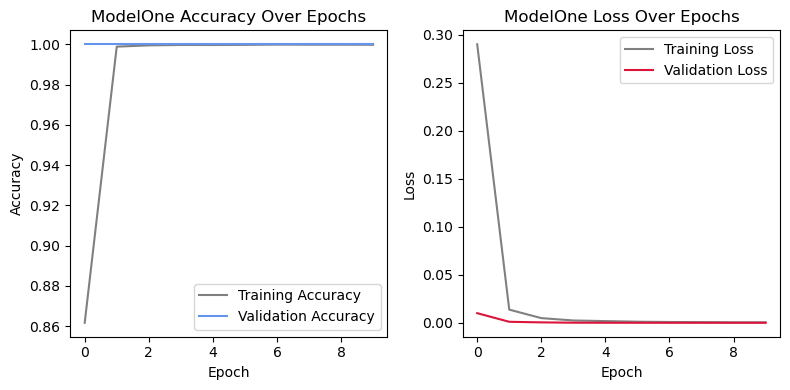

In [11]:
# Plot the accuracy over epochs
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'],
         label='Training Accuracy', color='grey')
plt.plot(history.history['val_accuracy'],
         label='Validation Accuracy', color='cornflowerblue')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Over Epochs')
plt.legend()

# Plot the loss over epochs
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'],
         label='Training Loss', color='grey')
plt.plot(history.history['val_loss'],
         label='Validation Loss', color='crimson')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model Loss Over Epochs')
plt.legend()

plt.tight_layout()
plt.show()

In [12]:
# Testing the model and obtain the summary
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_accuracy * 100}%')

313/313 [==============================] - 0s 406us/step - loss: 1.6863e-06 - accuracy: 1.0000
Test Accuracy: 100.0%


313/313 [==============================] - 0s 362us/step


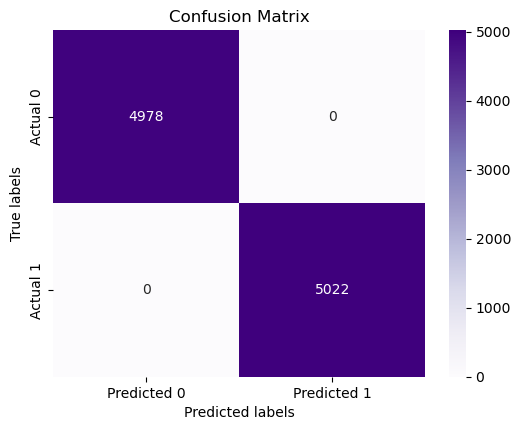

In [14]:
modelOne_pred_actual = model.predict(X_test)
modelOne_pred = [0 if x <= 0.5 else 1 for x in modelOne_pred_actual]

# Plot confusion matrix
conf_matrix = confusion_matrix(modelOne_pred, y_test)
plt.figure(figsize=(6, 4.5))
sns.heatmap(conf_matrix, annot=True, cmap='Purples', fmt='d',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# K-Nearest Neighbour


## Import Libraries


In [17]:
from sklearn.neighbors import KNeighborsClassifier

## Model and Evaluation


Normalise the rating and split the data into the test set (80%) and training set (20%). Then pass the data into the KNN model


In [18]:
# Encoding labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# KNN model
knn_classifier = KNeighborsClassifier(n_neighbors=3)
knn_classifier.fit(X_train, y_train)

# Predictions
y_pred = knn_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

Test Accuracy: 1.0
